### LinearRegression - Training model on Numerical Columns only

In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('data/cleaned.csv').drop('Unnamed: 0', axis=1)
df.drop_duplicates()

numerical_cols = ['price','number_rooms', 'living_area', 'fireplace', 'furnished', 'terrace', 'garden', 'terrace_area', 'garden_area', 'surface_land', 'number_facades', 'swimming_pool', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province','locality']

df.head(3)

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,461.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
1,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,343.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
2,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,392.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303


In [86]:
df.columns
df.isna().sum()

locality            0
property_type       0
property_subtype    0
price               0
number_rooms        0
living_area         0
kitchen             0
furnished           0
fireplace           0
terrace             0
terrace_area        0
garden              0
garden_area         0
surface_land        0
number_facades      0
swimming_pool       0
building_state      0
region              0
province            0
latitude            0
longitude           0
dtype: int64

In [87]:
X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

Mean absolute error = 111031.46

Mean squared error = 21912985347.15

Median absolute error = 85082.47

Explain variance score = 0.27

R2 score *coefficient of Determination = 0.27





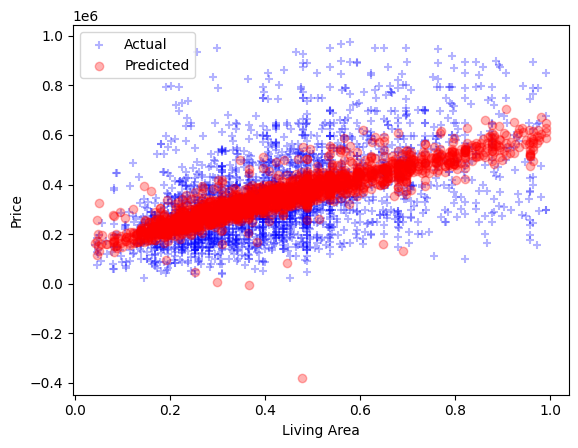

In [88]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y)

## Dropping less correlated numerical columns

In [89]:
df[numerical_cols].corr()['price'].sort_values(ascending=False)

price             1.000000
living_area       0.510183
number_rooms      0.394339
surface_land      0.226332
number_facades    0.178113
fireplace         0.117429
garden            0.117067
terrace           0.116482
swimming_pool     0.101552
terrace_area      0.094717
garden_area       0.078511
latitude          0.015135
furnished        -0.012716
longitude        -0.063976
Name: price, dtype: float64

In [90]:
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province','locality']

X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

Mean absolute error = 111349.84

Mean squared error = 22121910243.09

Median absolute error = 85008.15

Explain variance score = 0.28

R2 score *coefficient of Determination = 0.28





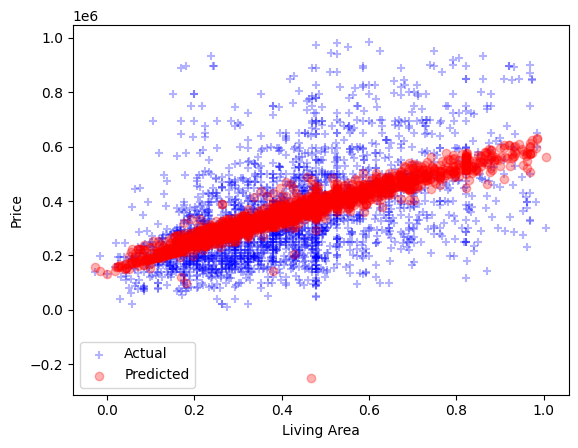

In [91]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y)

## Changing the categorical values to OneHotencoded + only use most correlated Numerical Column


In [92]:
# including Locality to see if any difference ==> LOCALITY HAS NEGATIVE INFLUENCE
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province']
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades', 'latitude', 'longitude']

dummies = pd.get_dummies(df[cat_cols], columns=cat_cols)

new_df = pd.concat([df[numerical_cols], dummies], axis=1)
new_df


,price,number_rooms,living_area,surface_land,number_facades,latitude,longitude,property_type_APARTMENT,property_type_HOUSE,property_subtype_APARTMENT,...,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
0,399500.0,3.0,197.0,461.0,3.0,49.746322,3.073303,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,381000.0,3.0,197.0,343.0,3.0,49.746322,3.073303,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,393500.0,3.0,192.0,392.0,3.0,49.746322,3.073303,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,315000.0,3.0,197.0,509.0,3.0,49.746322,3.073303,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,305000.0,3.0,195.0,453.0,3.0,49.746322,3.073303,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,449000.0,3.0,168.0,480.0,3.0,50.821858,3.897035,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9900,549000.0,3.0,180.0,705.0,4.0,50.821858,3.897035,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9901,449000.0,3.0,168.0,517.0,3.0,50.821858,3.897035,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9902,599000.0,4.0,199.0,1104.0,4.0,51.020971,3.639755,False,True,False,...,False,True,False,False,False,False,False,False,False,False


Mean absolute error = 10631448312436.44

Mean squared error = 2.7985656406842408e+29

Median absolute error = 61008.0

Explain variance score = -9.44039838269392e+18

R2 score *coefficient of Determination = -9.444212685071385e+18





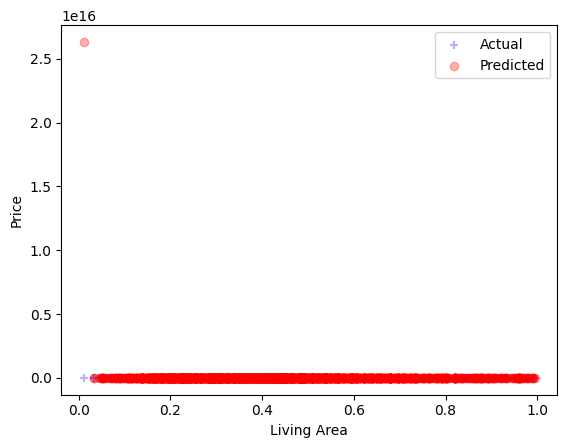

In [93]:
from src.model_functions import train_linear_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

#Training the Linear Model (LinearRegression) - and normalize the data with MinMaxScaler
train_linear_regr(X, y)

## Model K-Nearest Neighbour

In [94]:
from src.model_functions import train_knn_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

Scores for the initial training (Without GridSearch)
Mean absolute error = 85411.43

Mean squared error = 14095037196.6

Median absolute error = 63075.0

Explain variance score = 0.55

R2 score *coefficient of Determination = 0.54



Calculating best parameters through GridSearchCV
Best score: 0.5766391384168331
Best n_neighbors param: <bound method BaseEstimator.get_params of KNeighborsRegressor(metric='cityblock', n_neighbors=14, weights='distance')>


Best Params found by GridSearchCV: <bound method BaseEstimator.get_params of KNeighborsRegressor(metric='cityblock', n_neighbors=14, weights='distance')>


TypeError: src.model_functions.train_knn_regr() argument after ** must be a mapping, not set

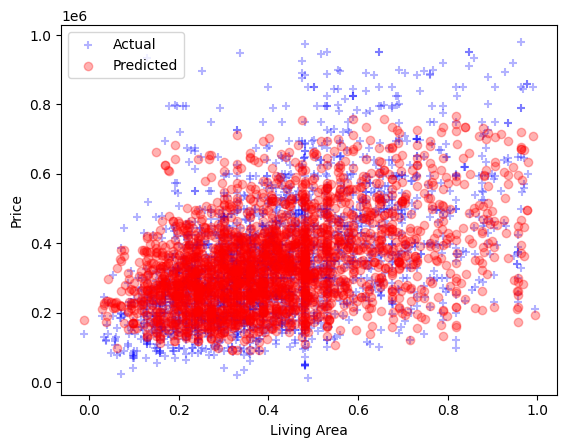

In [95]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
params = {'n_neighbors':14}
print("Scores for the initial training (Without GridSearch)")
model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, **params)

# implementing GridSearch
# Check for the best n_neighbor and other hyperparameters

from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": np.arange(10,15), 
          "metric": ["euclidean", "cityblock"],
          "weights":['uniform', 'distance'],
          "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

print('Calculating best parameters through GridSearchCV. . .')
grid = GridSearchCV(estimator=model,param_grid=params)
grid.fit(X_train, y_train)
print(f'Best score: {grid.best_score_}')
print(f'Best n_neighbors param: {grid.best_estimator_.get_params}')

# Retrain the model with the optimal parameters
print('\n')
print(f'Best Params found by GridSearchCV: {grid.best_estimator_.get_params}')

best_params = dict(grid.best_estimator_.get_params)
model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, **best_params)

## Polynomial regresssion (NOT useful if degree > 1)

Mean absolute error = 82504.55

Mean squared error = 12456227318.99

Median absolute error = 62328.0

Explain variance score = 0.57

R2 score *coefficient of Determination = 0.57





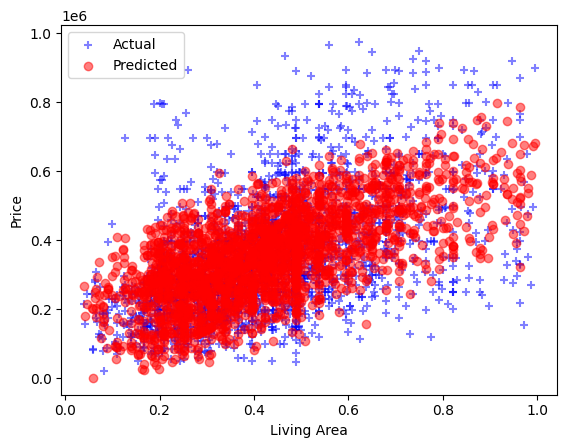

In [ ]:
from src.model_functions import train_polynomial_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

degree = 1
train_polynomial_regr(X, y, degree)

## Huberregressor

Mean absolute error = 80147.96

Mean squared error = 12822075932.83

Median absolute error = 59685.25

Explain variance score = 0.57

R2 score *coefficient of Determination = 0.57





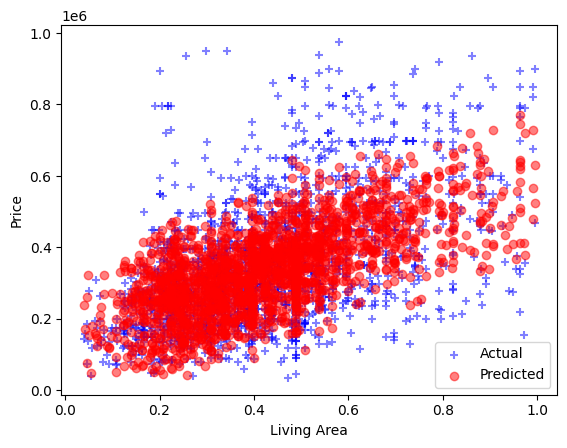

In [ ]:
from src.model_functions import train_huberregressor

train_huberregressor(X,y)

## Decision Tree Regressor (sklearn.tree.DecisionTreeRegressor)

Mean absolute error = 84482.47

Mean squared error = 15527138836.42

Median absolute error = 56250.0

Explain variance score = 0.47

R2 score *coefficient of Determination = 0.47





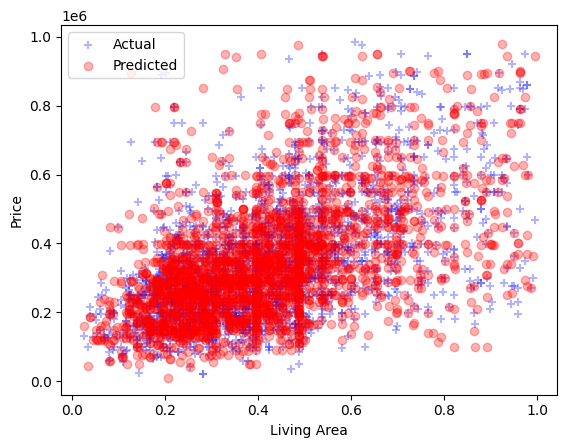

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from src.model_functions import scale_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as sm

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

model = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train, X_test = scale_data(X_train, X_test)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

plt.scatter(X_test['living_area'], y_test, marker='+', alpha=0.3, c='blue', label='Actual')
plt.scatter(X_test['living_area'], y_preds, marker='o', alpha=0.3, c='red', label='Predicted')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.legend()

print(f"Mean absolute error = {round(sm.mean_absolute_error(y_test, y_preds), 2)}\n")
print(f"Mean squared error = {round(sm.mean_squared_error(y_test, y_preds), 2)}\n") 
print(f"Median absolute error = {round(sm.median_absolute_error(y_test, y_preds), 2)}\n")
print(f"Explain variance score = {round(sm.explained_variance_score(y_test, y_preds), 2)}\n")
print(f"R2 score *coefficient of Determination = {round(sm.r2_score(y_test, y_preds), 2)}\n")
print('\n')